<a href="https://colab.research.google.com/github/PingiliVaishnaviReddy/OIBSIP-Iris-Prediction/blob/main/Iris_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [109]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [111]:
data.shape

(150, 6)

In [112]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [113]:
X = data.drop(columns=['Species'])
y = data['Species']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (120, 5)
Testing set size: (30, 5)


<Figure size 1200x1000 with 0 Axes>

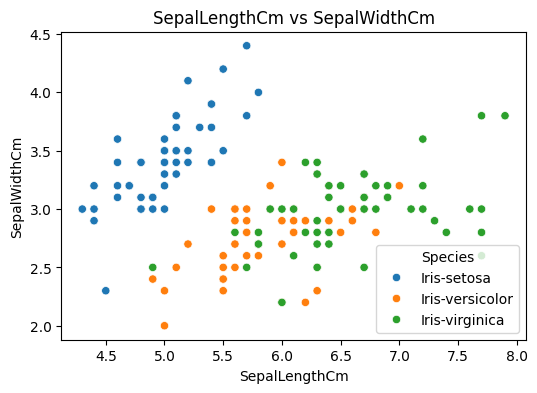

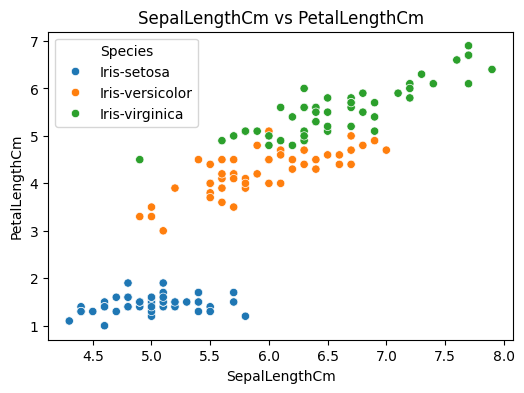

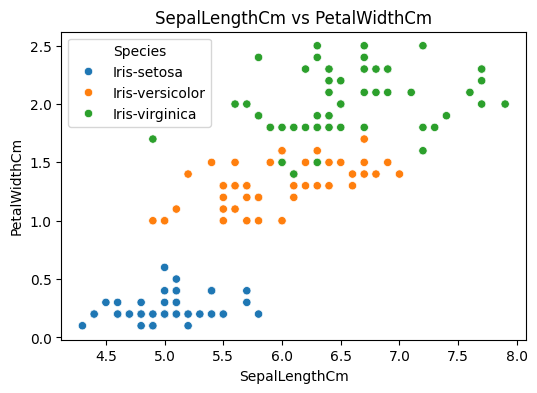

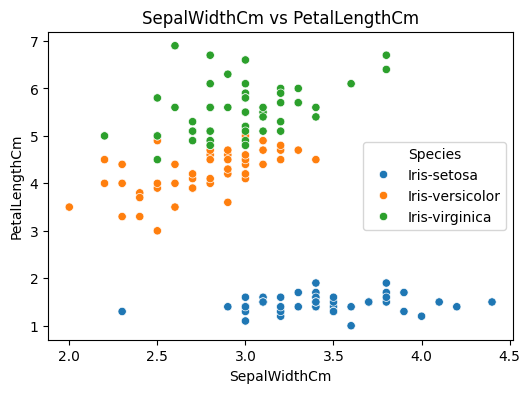

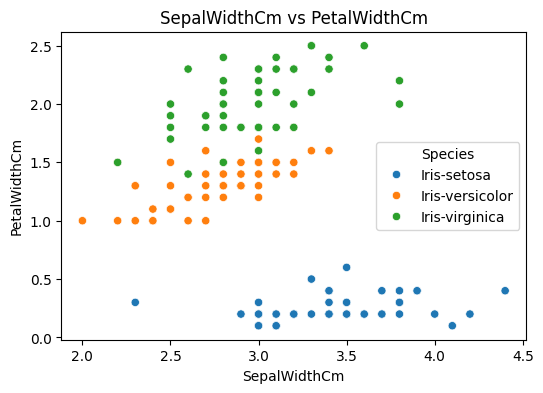

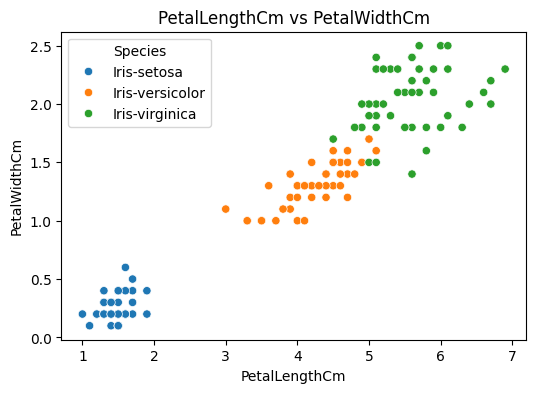

In [115]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(12, 10))

for i in range(len(features)):
    for j in range(i + 1, len(features)):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=data, x=features[i], y=features[j], hue='Species')
        plt.title(f"{features[i]} vs {features[j]}")
        plt.legend(title='Species')
        plt.show()

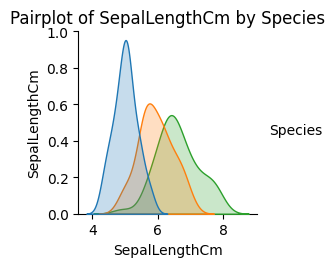

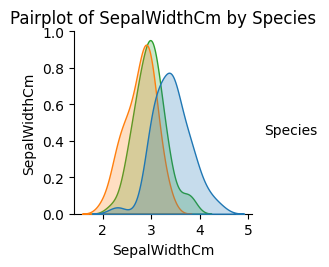

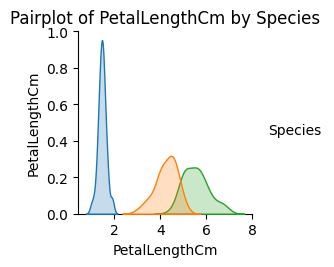

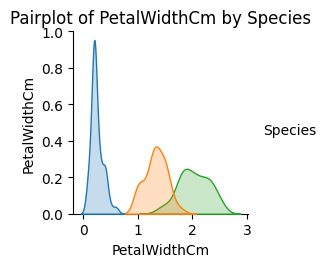

In [116]:
for feature in features:
    sns.pairplot(data, vars=[feature], hue='Species', markers=['o', 's', 'D'])
    plt.title(f'Pairplot of {feature} by Species')
    plt.show()

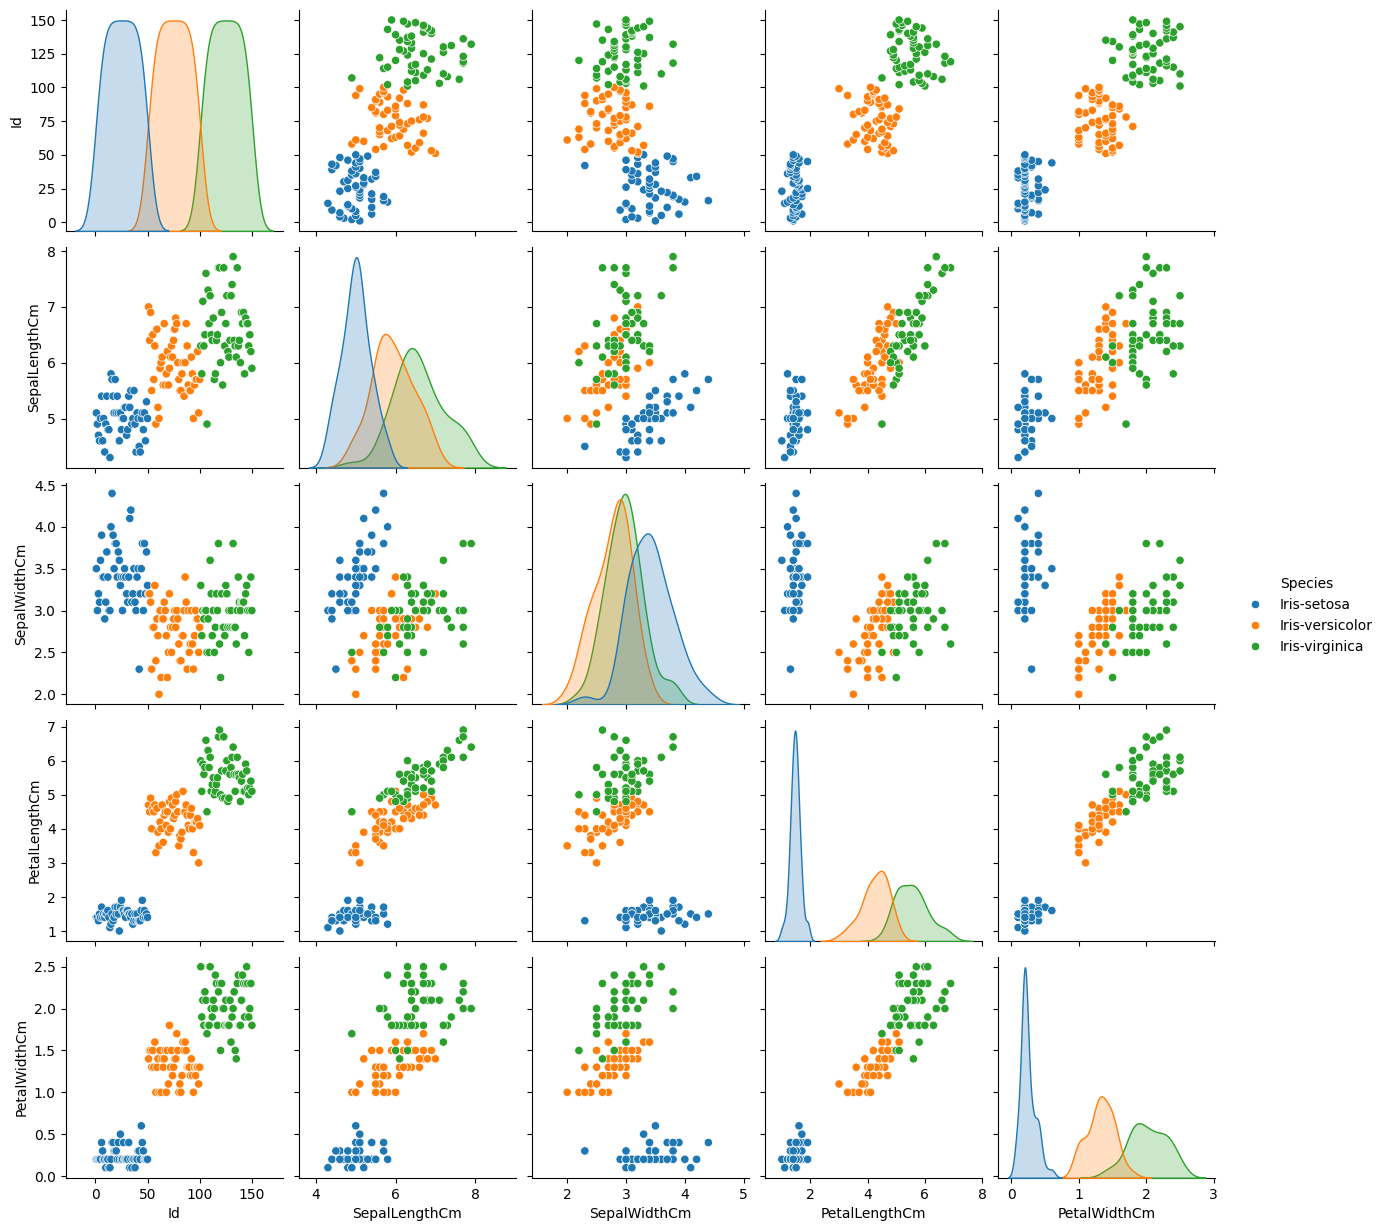

In [117]:
sns.pairplot(data, hue='Species')
plt.show()

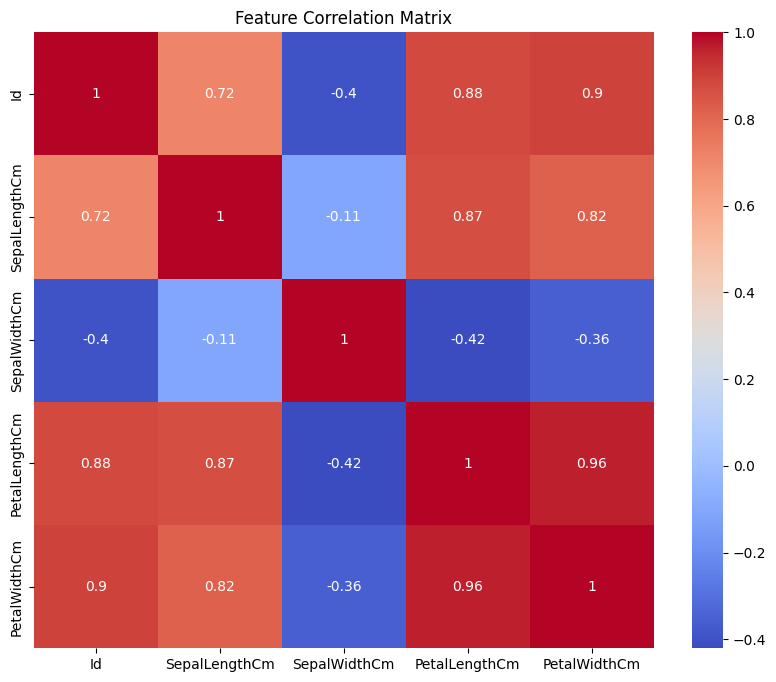

In [118]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns=['Species']).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

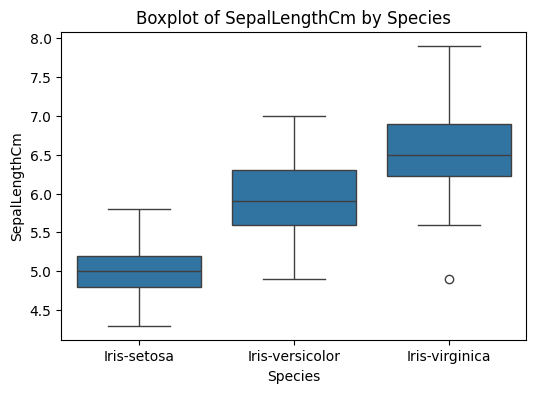

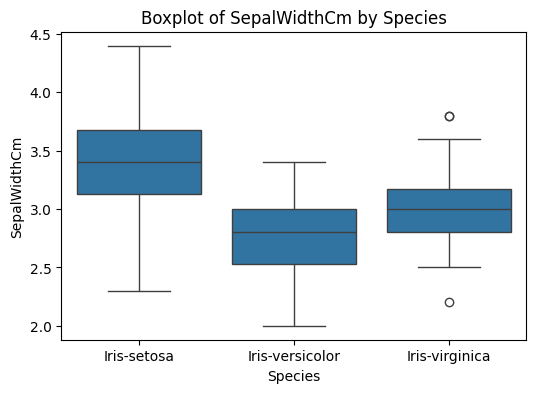

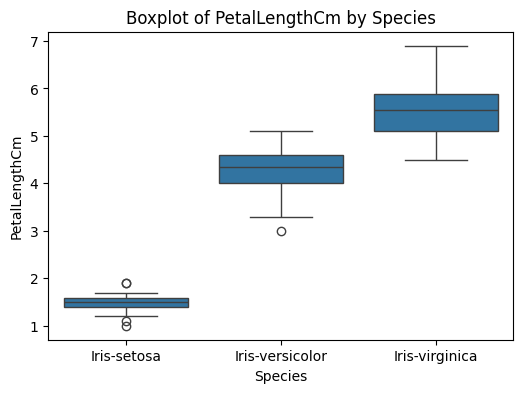

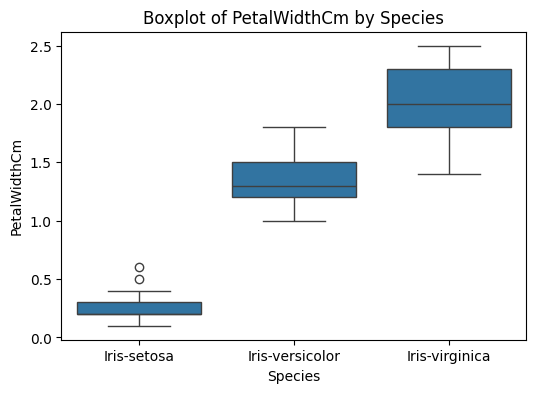

In [119]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data['Species'], y=data[feature])
    plt.title(f'Boxplot of {feature} by Species')
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.show()

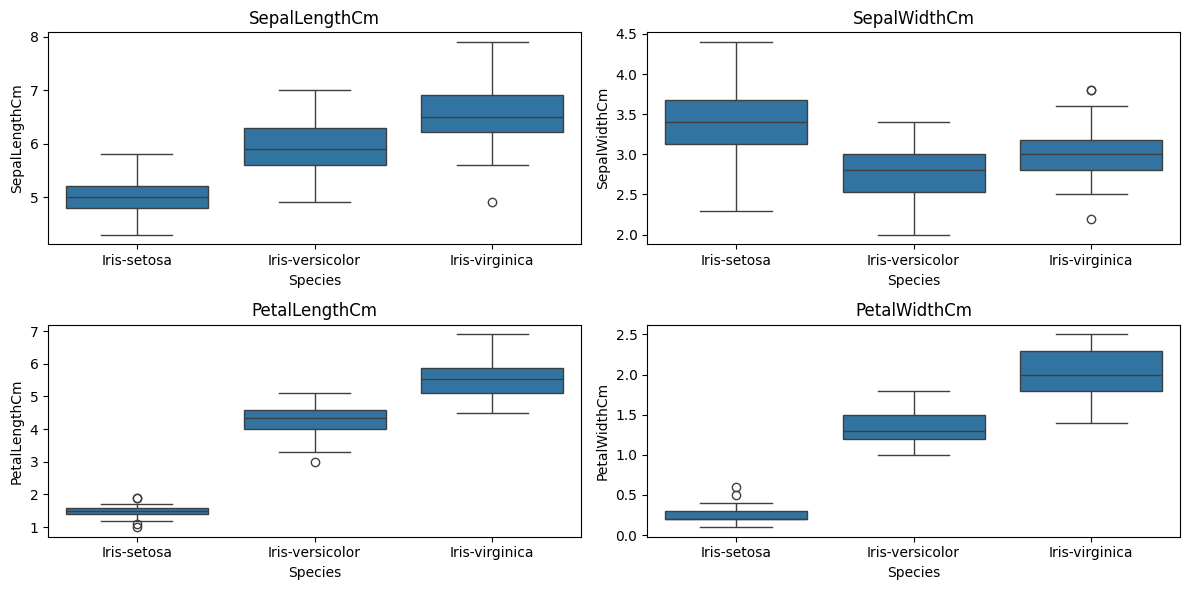

In [120]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=data['Species'], y=data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [121]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [122]:
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [123]:
y_pred = model.predict(X_test_scaled)

In [124]:
with open('my_iris_model.pkl', 'wb') as model_file:
    pickle.dump((model, scaler, le), model_file)

In [125]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_.astype(str)))  # Convert le.classes_ to strings
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Accuracy Score: 1.00


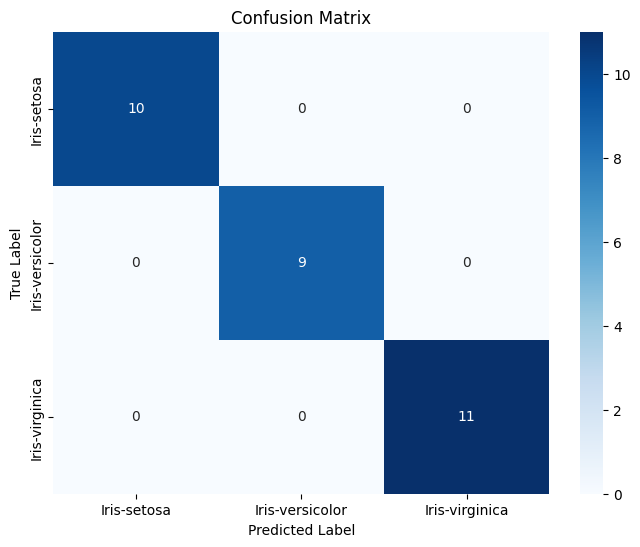

In [126]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.inverse_transform([0, 1, 2]),
            yticklabels=le.inverse_transform([0, 1, 2]))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

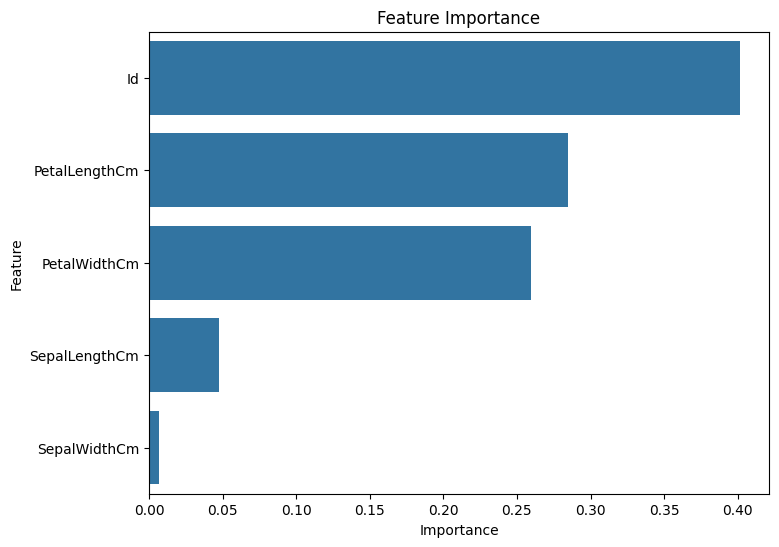

In [127]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

In [128]:
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    """Make predictions for new iris flowers using the saved model"""
    with open('my_iris_model.pkl', 'rb') as model_file:
        model, scaler, le = pickle.load(model_file)
    new_data = np.array([[sepal_length, sepal_width, petal_length, petal_width, 0]])
    new_data_scaled = scaler.transform(new_data)
    prediction = model.predict(new_data_scaled)
    species = le.inverse_transform(prediction)[0]
    return species

In [129]:
import pickle
with open('my_iris_model.pkl', 'wb') as model_file:
    pickle.dump((model, scaler, le, X.columns.tolist()), model_file)
print("Model saved successfully!")

Model saved successfully!
